In [1]:
import pandas as pd
from sklearn import preprocessing

advert = pd.read_csv('data/Advertising.csv', index_col=0)

In [2]:
advert.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(0)
X = 2.5 * np.random.randn(100) + 1.5
res = 0.5 * np.random.randn(100)
y = 2 + 0.3 * X + res

df = pd.DataFrame(
    {
        'X': X,
        'y': y
    }
)

df.head(10)

,X,y
0,5.910131,4.714615
1,2.500393,2.076238
2,3.946845,2.548811
3,7.102233,4.615368
4,6.168895,3.264107
5,-0.943195,2.688852
6,3.875221,2.955757
7,1.121607,1.962755
8,1.241953,3.334057
9,2.526496,3.498206


In [4]:

# Calculando as médias de X e y.
xmean = np.mean(X)
ymean = np.mean(y)

# Calcular os termos necessários para encontrar 𝛽, 
# i.e., o numerador (covariancia entre X e y) e o denominador (variância de X).
df['xycov'] = (df['X'] - xmean) * (df['y'] - ymean)
df['xvar'] = (df['X'] - xmean)**2

# Computando 𝛽 e 𝛼.
beta = df['xycov'].sum() / df['xvar'].sum()
alpha = ymean - (beta * xmean)
print(f'alpha = {alpha}')
print(f'beta = {beta}')

alpha = 2.0031670124623426
beta = 0.3229396867092763


In [5]:
ypred = alpha + beta * X
print(ypred)

[3.91178282 2.81064315 3.27775989 4.29675991 3.99534802 1.69857201
 3.25462968 2.36537842 2.40424288 2.81907292 2.60387001 3.66168312
 3.10199975 2.58581077 2.84592918 2.75696825 3.69382011 2.32194218
 2.74033151 1.79802302 0.42642221 3.015275   3.18547843 1.88839019
 4.32006116 1.31339555 2.52451965 2.33645381 3.72506464 3.67386219
 2.61267323 2.79288576 1.77082341 0.88838207 2.20668994 2.61380476
 3.48085076 3.45831697 2.17486854 2.24351265 1.64102813 1.34112617
 1.11002064 4.06253353 2.07610925 2.1338976  1.47613319 3.11528277
 1.18459738 2.31582084 1.76462232 2.79994197 2.07517841 1.53439407
 2.46482364 2.83338994 2.54127917 2.73177699 1.9754571  2.19471775
 1.94466613 2.19729158 1.83108353 1.09386364 2.6308214  2.16319902
 1.17143718 2.86120343 1.75506992 2.52951462 3.07620724 2.59171079
 3.40747079 1.49064088 2.81240675 1.93469565 1.78453915 2.02024272
 2.23604485 2.53292159 1.54689373 3.2148581  2.86352875 1.24729141
 3.68911579 4.01822118 3.43926331 2.34231437 1.62310525 3.3388

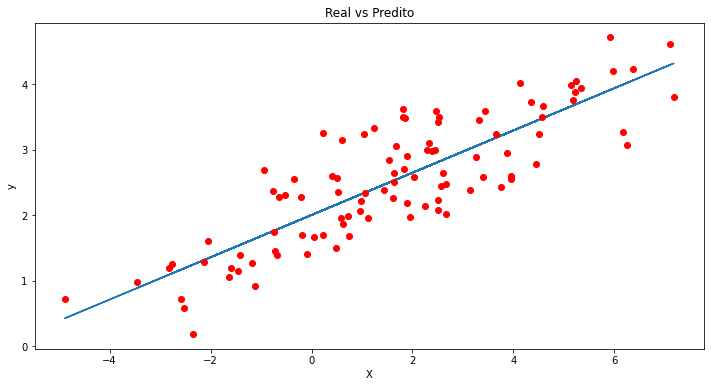

In [6]:
# Plotando a regressão contra os dados reais
plt.figure(figsize=(12, 6))
plt.plot(X, ypred)     # linha da regressão
plt.plot(X, y, 'ro')   # scatter plot mostrando os dados reais
plt.title('Real vs Predito')
plt.xlabel('X')
plt.ylabel('y')

plt.show()

In [7]:
from sklearn.linear_model import LinearRegression

# Constroi o modelo de regressão linear usando as variáveis TV e Radio.
# Separa os dados em variáveis de predição de entrada X e a saída y
predictors = ['TV', 'radio', 'newspaper']
#predictors = ['TV']
X = advert[predictors]
y = advert['sales']

# Inicializa e ajusta o modelo
lm = LinearRegression()
model = lm.fit(X, y)

In [8]:
vendas = model.predict(X)
print(f'vendas = {vendas}')

vendas = [20.52397441 12.33785482 12.30767078 17.59782951 13.18867186 12.47834763
 11.72975995 12.12295317  3.72734086 12.55084872  7.0322992  17.28512918
 10.57712073  8.82630048 18.43436638 20.81929952 12.82365674 23.22495716
  9.95168206 14.16607293 18.10076728 14.7405382   6.4891503  16.5459329
  8.14651887 15.6100386  14.98951429 17.05167344 19.41053803  9.14402389
 21.6339338  11.3460929   7.63888314 18.86426829  7.57483051 17.00682618
 23.40590052 15.62347779  9.90868103 20.44761039 16.37766467 17.2959832
 21.59580326 13.96385684  8.88787996 15.16152314  8.87338673 21.7226299
 16.26362018  8.1681656  12.63121132  9.33981296 20.66297563 19.94469957
 20.37443008 21.2926106   8.52771254 12.77458802 21.89805198 18.13348698
  5.74215558 22.89067208 16.78426073 13.21069202 16.97773556  7.84904532
  9.01603163 12.0370073  18.97657924 21.10891244 17.77949782 10.62693815
 10.36684881  9.90298206 17.32931197 11.85832174  4.47758904 13.81190223
  8.81331353  9.67530328 11.44592364 14.64794

In [12]:
new_X = [[100, 300, 100]]
print(model.predict(new_X))

[63.97060969]
